In [1]:
import pandas as pd
import numpy as np
import os
import sys
import datetime
import time
import math 

#from netCDF4 import Dataset, num2date
import matplotlib.pyplot as plt

import matplotlib.dates as mdates
import matplotlib.colors
import matplotlib.ticker as ticker

import pyart

import pytz
# import shap
import pickle
import multiprocessing

import cartopy.crs as ccrs

from sklearn.metrics.pairwise import haversine_distances
from math import radians

RANDOM_STATE = 42

import warnings
warnings.filterwarnings("ignore")


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [4]:
folder = 'spatial'
node_id = '10004098'
dir_out = '../figures/' + folder + '/'
dir_data = '../data/'
dir_NEXRAD = '/Volumes/Backup Plus/NEXRAD/data/'

years = ['2019','2020'] ####
months = ['1','2','3','4','5','6','7','8','9','10','11','12']
days = np.array(range(1,31+1)).astype(str) #### np.array(range(1,31+1)).astype(str)
days = list(days)

hours = (np.array(range(0,24))).astype(str)
hours = list(hours)

bins = np.array(range(0,420+1)).astype(str)
bins = list(bins)
for i in range(len(bins)):
    bins[i] = 'Spectrum[' + bins[i] + ']'

wavelengths = np.array(range(360,780+1)).astype(str)
for i in range(len(wavelengths)):
    wavelengths[i] = wavelengths[i] + 'nm'
wavelengths = list(wavelengths)

km_max = 5


In [ ]:
# read driving data with NEXRAD and landsat
fn0 = dir_data + 'driving_' + node_id + '_NEXRAD_'+str(km_max)+'km_landsat.csv'
df0 = pd.read_csv(fn0, parse_dates=True, index_col = 'UTC')

In [3]:
# read humidity data
node_airmar = '001e0610c2e9'
fn_humidity = '../Minolta/' + node_airmar + '_humidity.csv'
df_humidity = pd.read_csv(fn_humidity, parse_dates=True, index_col = 'UTC')

In [15]:
len(df0)

21508

In [16]:
len(df_humidity)

1424489

In [30]:
# merge humidity
df_merged = df0.copy()
df_merged['relativeHumidity'] = df_humidity
len(df_merged)

21508

In [32]:
fn_merged = dir_data + 'driving_' + node_id + '_NEXRAD_'+str(km_max)+'km_landsat_humidity.csv'
df_merged.to_csv(fn_merged)

In [18]:
# plot
dir_figure = '../figures/humidity/'
if not os.path.exists(dir_figure):
    os.mkdir(dir_figure)

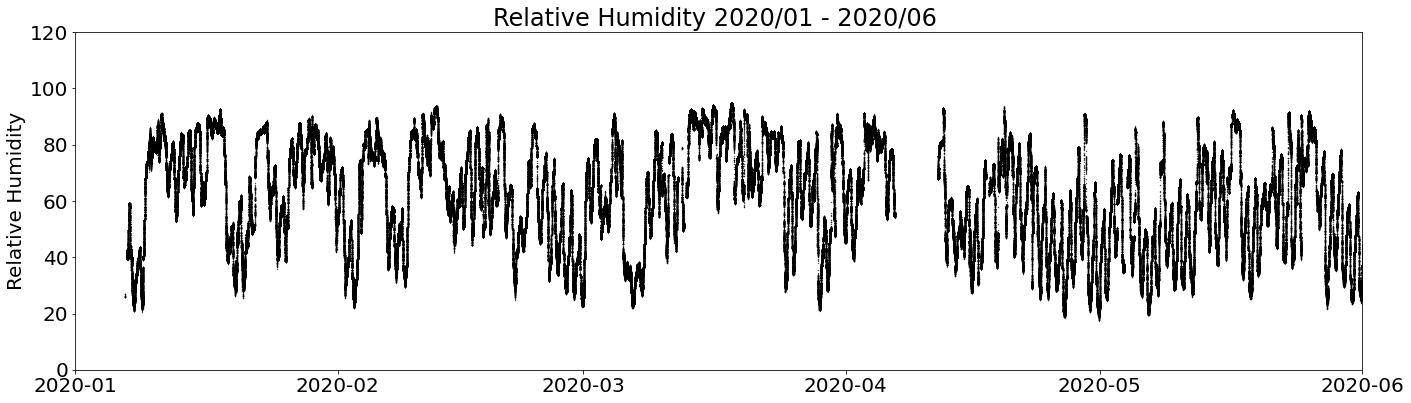

In [25]:
plt.rcParams["figure.figsize"] = (20, 6) # (w, h)
plt.rcParams.update({'font.size': 20})

plt.scatter(df_humidity.index, df_humidity['relativeHumidity'], s = 0.1, c = 'k')
plt.xlim([datetime.date(2020, 1, 1),datetime.date(2020, 6, 1)])
plt.ylim([0,120])

plt.title('Relative Humidity 2020/01 - 2020/06 ')
# plt.xlabel('')
plt.ylabel('Relative Humidity')
plt.tight_layout()
plt.savefig(dir_figure + 'humidity.png')
# plt.close()

In [27]:
df_humidity['relativeHumidity'].min(), df_humidity['relativeHumidity'].max(), df_humidity['relativeHumidity'].mean()

(12.6, 94.8, 59.065166116545505)